#DIABETES CLASSIFICATION

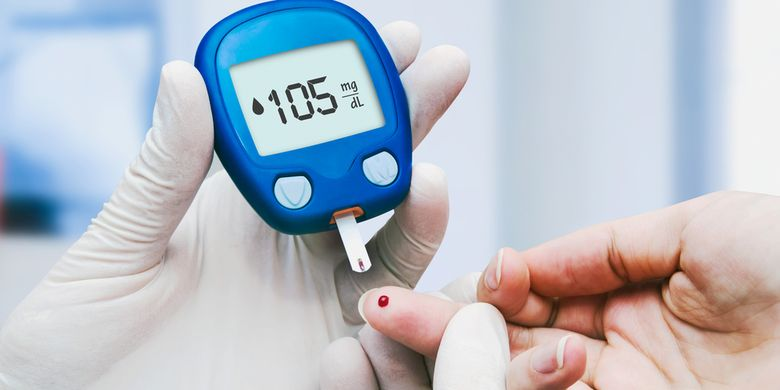


  Pendekatan machine learning telah menjadi alat yang sangat efektif dalam menganalisis dan mengklasifikasikan kondisi medis, termasuk diabetes, dengan tingkat akurasi yang tinggi. Diabetes, sebagai penyakit metabolik yang memengaruhi jutaan orang di seluruh dunia, menuntut pendekatan yang cermat dan inovatif dalam diagnosis dan manajemennya. Dalam penelitian ini, kami berfokus pada pengembangan model klasifikasi diabetes menggunakan teknik machine learning guna meningkatkan deteksi dini, pemahaman yang lebih baik tentang faktor risiko, dan mendukung perawatan yang lebih efektif. Dataset yang digunakan akan mencakup berbagai parameter klinis dan demografis, memungkinkan model untuk memahami pola kompleks yang terkait dengan diabetes. Dengan memanfaatkan kekuatan machine learning, penelitian ini bertujuan untuk memberikan kontribusi positif dalam upaya pencegahan dan manajemen diabetes, membuka jalan menuju solusi yang lebih personal dan terfokus pada pasien.

##LOAD DATA

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##EXPLORATORY DATA ANALISYST

In [45]:
df.shape

(768, 9)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [51]:
def plot_corr(df, size=10):
  corr = df.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.xticks(range(len(corr.columns)), corr.columns)

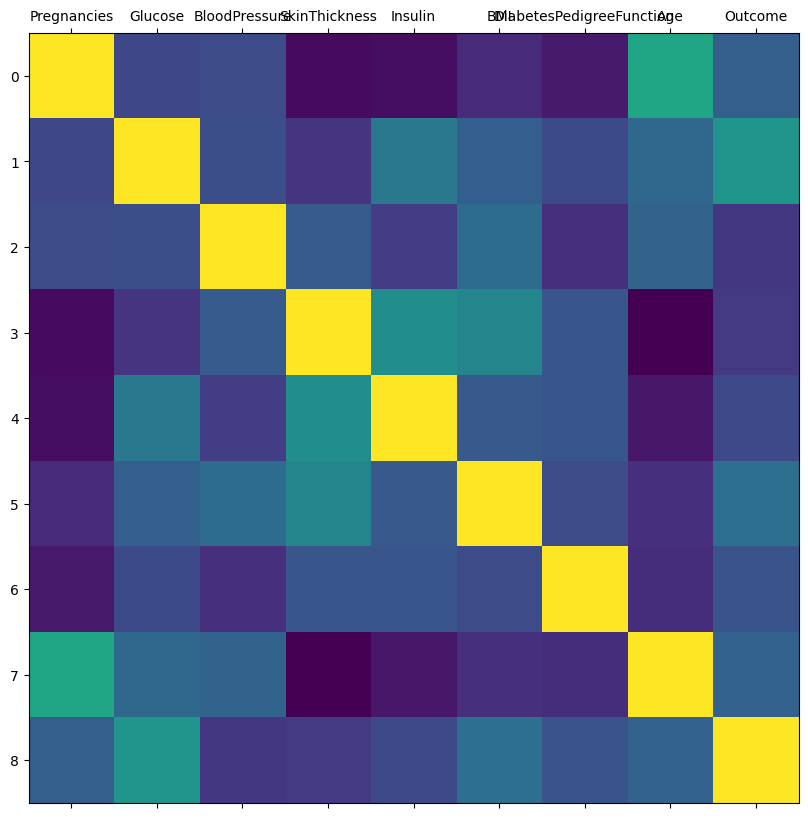

In [52]:
plot_corr(df)

In [53]:
num_obs = len(df)
num_true = len(df.loc[df['Outcome'] == 1])
num_false = len(df.loc[df['Outcome'] == 0])
print("Jumlah Terkena Diabetes : {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs)*100))
print("Jumlah tidak Terkena Diabetes : {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs)*100))

Jumlah Terkena Diabetes : 268 (34.90%)
Jumlah tidak Terkena Diabetes : 500 (65.10%)


##SPLIT DATA

Split data dengan 70% training dan 30% testing

In [54]:
from sklearn.model_selection import train_test_split

x=df.drop(columns = 'Outcome', axis=1)
y=df['Outcome']

In [55]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [56]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 42)

In [58]:
print("{0:0.2f}% ada pada training set". format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% ada pada testing set". format((len(x_test)/len(df.index))*100))

69.92% ada pada training set
30.08% ada pada testing set


##NAIVE BAYES

In [59]:
from sklearn.naive_bayes import GaussianNB
nb_model =GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB()

In [60]:
from sklearn import metrics

nb_predict_train = nb_model.predict(x_train)
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

nb_predict_test = nb_model.predict(x_test)
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy : 0.7672
Accuracy : 0.7446


In [61]:
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

